# Propriétés d'une population fictive de 130 personnes: analyse bivariée

Version du 24 avril 2022

130 individus, cinq caractères: age, personnes dans le même foyer, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Références bibliographiques

Référence:

* [Statistique descriptive bidimensionnelle](http://wikistat.fr/pdf/st-l-des-bi.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [3]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/observations_mod.csv'

obs = pd.read_csv(path)
obs.set_index('id', inplace=True)
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [4]:
## Nombre de lignes et de colonnes du tableau
obs.shape

(130, 5)

In [5]:
### Liste des colonnes, i.e. variables
obs.columns

Index(['age', 'n_foyer', 'lecture_journal', 'parti', 'revenu_mensuel'], dtype='object')

# Comparaison de deux variables quantitatives

## Comparer l'âge et le revenu 

In [6]:
### Centralité et dispersion du revenu
obs['revenu_mensuel'].describe().round(2)

count      130.00
mean      7984.73
std       5604.53
min       1400.00
25%       4399.00
50%       7275.50
75%       9236.25
max      45000.00
Name: revenu_mensuel, dtype: float64

<AxesSubplot:>

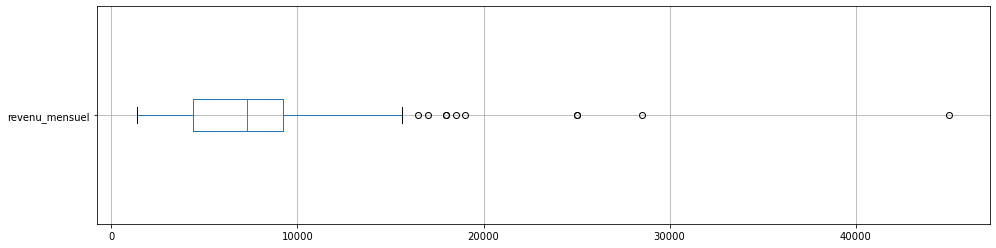

In [7]:
obs.boxplot(column=['revenu_mensuel'], vert=False, figsize=(16,4))

Text(0.5, 1.0, "Comparaison de l'âge et des revenus")

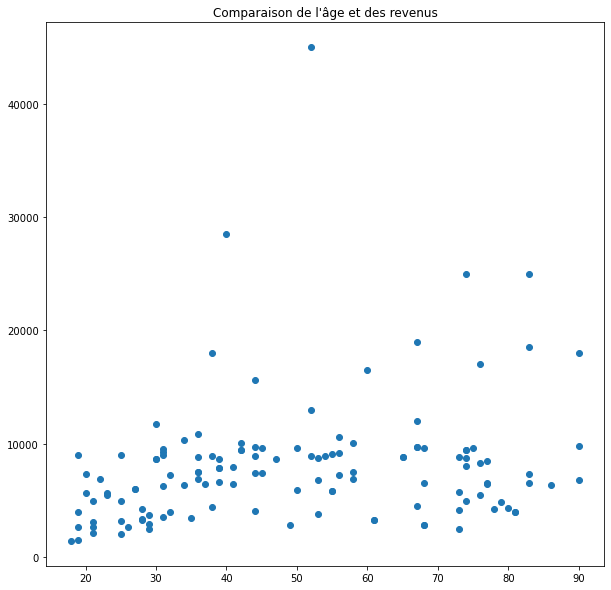

In [8]:
## Nuage de points, âge 

x = list(obs['age'])
y = list(obs['revenu_mensuel'])


plt.rcParams["figure.figsize"] = [10, 10]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")



In [9]:
### Coéfficient de corrélation de Pearsons, correlation positive faible
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0].round(4)

0.2333

In [10]:
### Normaliser les valeurs pour les comparer plus correctement: 
#  principe de base cf. Wikistat, Analyse bidimensionnelle, 2.2 
#  Noter que le logiciel adapte automatiquement le graphique et produite la même représentation 
#  https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
arm_obs = obs[['age', 'revenu_mensuel']].copy(deep=True)
norm_obs = (arm_obs-arm_obs.mean())/arm_obs.head().std()
norm_obs.head()

,age,revenu_mensuel
id,,
1,-0.289239,1.128311
2,-0.237160,-0.418068
3,0.231552,0.648098
4,1.898083,-1.123233
5,1.429371,-0.992573


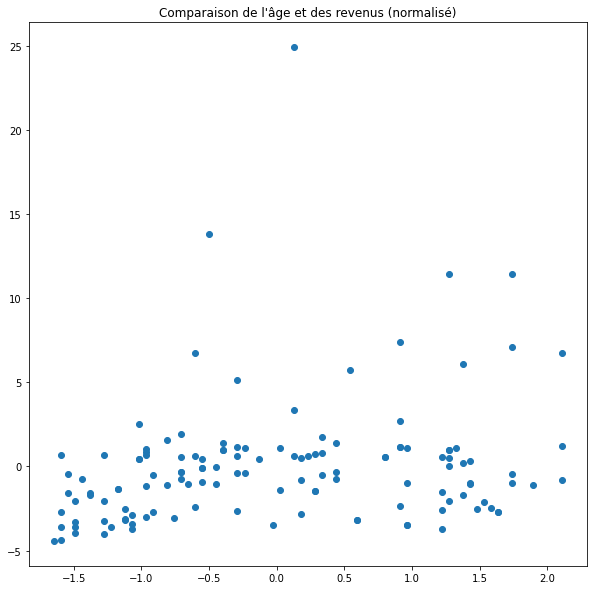

In [11]:
## Nuage de points 

x = list(norm_obs['age'])
y = list(norm_obs['revenu_mensuel'])


plt.rcParams["figure.figsize"] = [10,10]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus (normalisé)")
plt.show()


In [12]:
### Coéfficient de corrélation de Pearsons 
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0].round(4)

0.2333

Coeff. de Pearsons: 0.2333


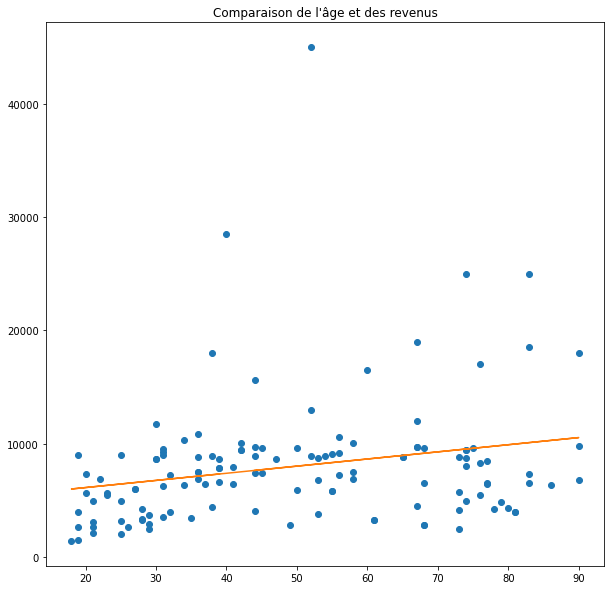

In [13]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(obs['age'])
y = np.array(obs['revenu_mensuel'])



plt.rcParams["figure.figsize"] = [10,10]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
plt.draw()

Coeff. de Pearsons: 0.4477


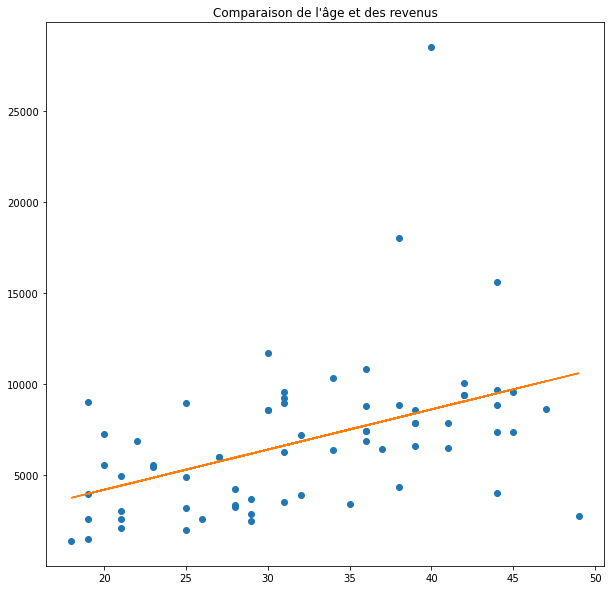

In [14]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

"""
x = np.array(obs[obs['revenu_mensuel'] < 12000]['age'])
y = np.array(obs[obs['revenu_mensuel'] < 12000]['revenu_mensuel'])
"""


x = np.array(obs[obs['age'] < 50]['age'])
y = np.array(obs[obs['age'] < 50]['revenu_mensuel'])



plt.rcParams["figure.figsize"] = [10,10]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
plt.draw()

# Application au cas des étudiant·e·s suisses

Y a-t-il corrélation entre étrangers et femmes ?

In [15]:
chemin_e = '../visualisation_exploration/data/etudiantes_universites_suisses_v3.csv'

In [16]:
### Lire le fichier 
obs_e = pd.read_csv(chemin_e, sep='\t')
obs_e.head()

,Année,Zürich,Basel,Genf,Bern,Lausanne,Freiburg,Neuenburg,Total,Zurich_f,...,Zürich_e,Basel_e,Genf_e,Bern_e,Lausanne_e,Freiburg_e,Neuenburg_e,Total_e,Total_h,Total_s
0,1891/92,543,401,536,534,289,168,60,2531,67,...,192,75,347.0,126,89.0,56,1.0,886.0,2289,1645
1,1892/93,582,442,594,567,349,173,50,2757,98,...,228,80,361.0,160,133.0,69,3.0,1034.0,2463,1723
2,1893/94,627,435,598,566,416,196,65,2903,133,...,252,85,361.0,157,178.0,88,5.0,1126.0,2558,1777
3,1894/95,681,459,653,630,402,240,59,3124,143,...,287,99,407.0,189,166.0,125,5.0,1278.0,2752,1846
4,1895/96,678,410,685,625,421,242,61,3122,154,...,312,80,442.0,180,186.0,114,11.0,1325.0,2715,1797


In [17]:
obs_e.columns

Index(['Année', 'Zürich', 'Basel', 'Genf', 'Bern', 'Lausanne', 'Freiburg',
       'Neuenburg', 'Total', 'Zurich_f', 'Bâle_f', 'Genève_f', 'Berne_f',
       'Lausanne_f', 'Fribourg_f', 'Neuchâtel_f', 'Total_f', 'Zürich_e',
       'Basel_e', 'Genf_e', 'Bern_e', 'Lausanne_e', 'Freiburg_e',
       'Neuenburg_e', 'Total_e', 'Total_h', 'Total_s'],
      dtype='object')

In [18]:
obs_e['Total_f'].isnull().values.sum()

0

In [19]:
obs_e['Total_e'].isnull().values.sum()

2

In [20]:
obs_e[['Total_f','Total_e']].fillna(0).tail()

,Total_f,Total_e
95,25276,11690.0
96,26070,0.0
97,27116,0.0
98,28570,12494.0
99,30467,13401.0


In [21]:
obs_e2 = obs_e[obs_e['Année'] < '1987'][['Total_f','Total_e']]
obs_e2.tail()

,Total_f,Total_e
91,21357,11125.0
92,22820,11462.0
93,23888,11457.0
94,24703,11656.0
95,25276,11690.0


Coeff. de Pearsons: 0.9226


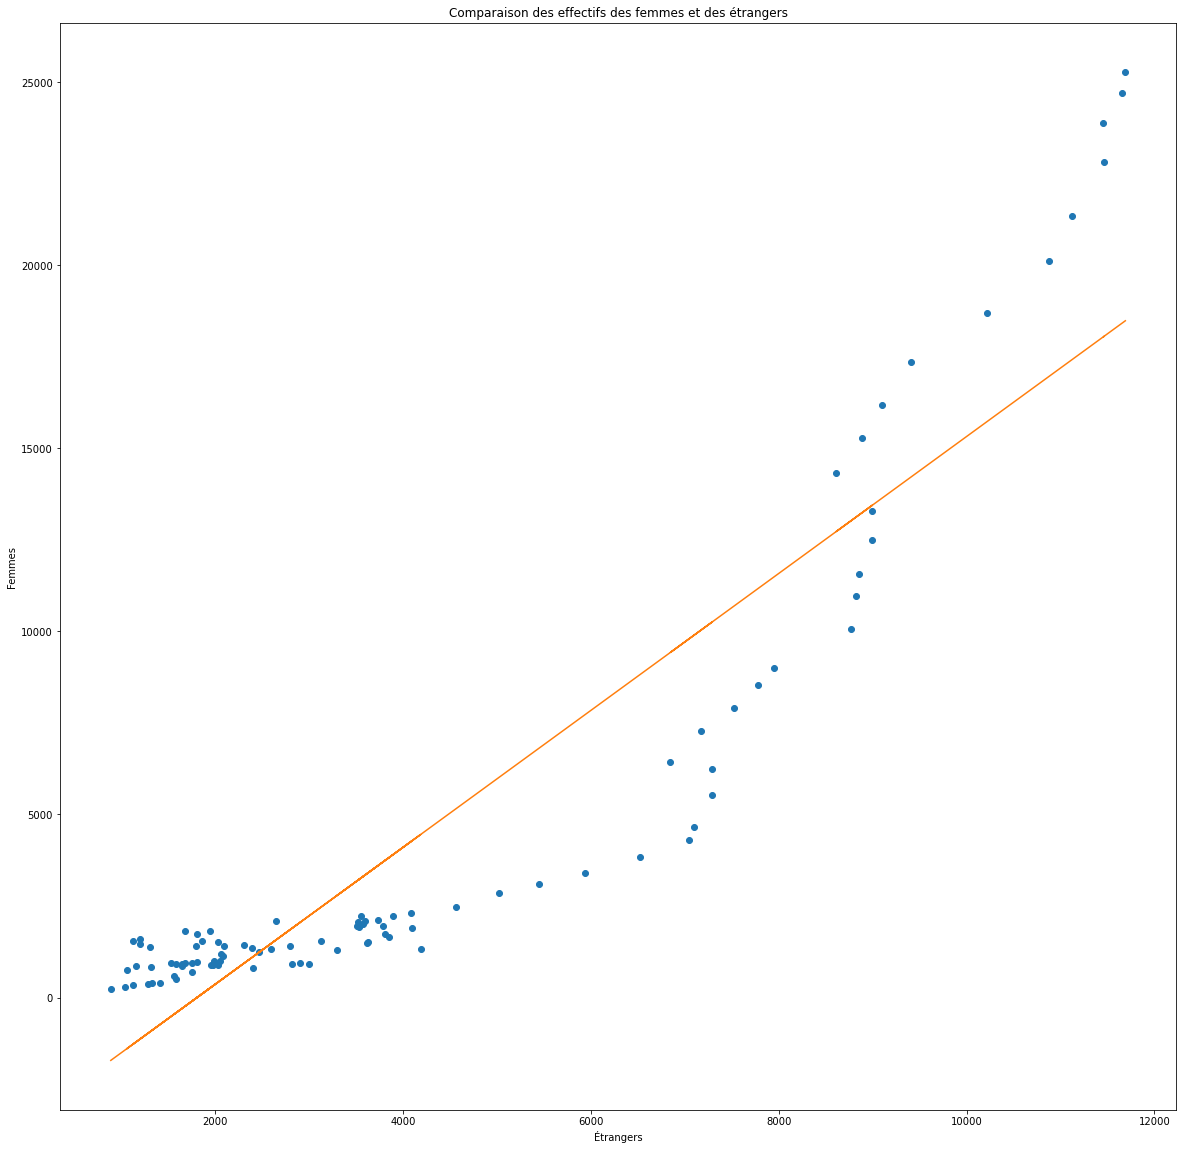

In [22]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(obs_e2['Total_e'])
y = np.array(obs_e2['Total_f'])


plt.rcParams["figure.figsize"] = [20, 20]

plt.plot(x, y, 'o')
plt.title("Comparaison des effectifs des femmes et des étrangers")
plt.xlabel("Étrangers")
plt.ylabel('Femmes')


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
plt.show()

In [23]:
obs_e3 = obs_e[obs_e['Année'] < '1920'][['Année','Total_f','Total_e']]
obs_e3.tail()

,Année,Total_f,Total_e
24,1915/16,812,2404.0
25,1916/17,930,2904.0
26,1917/18,928,2819.0
27,1918/19,877,2029.0
28,1919/20,897,1955.0


Coeff. de Pearsons: 0.9287


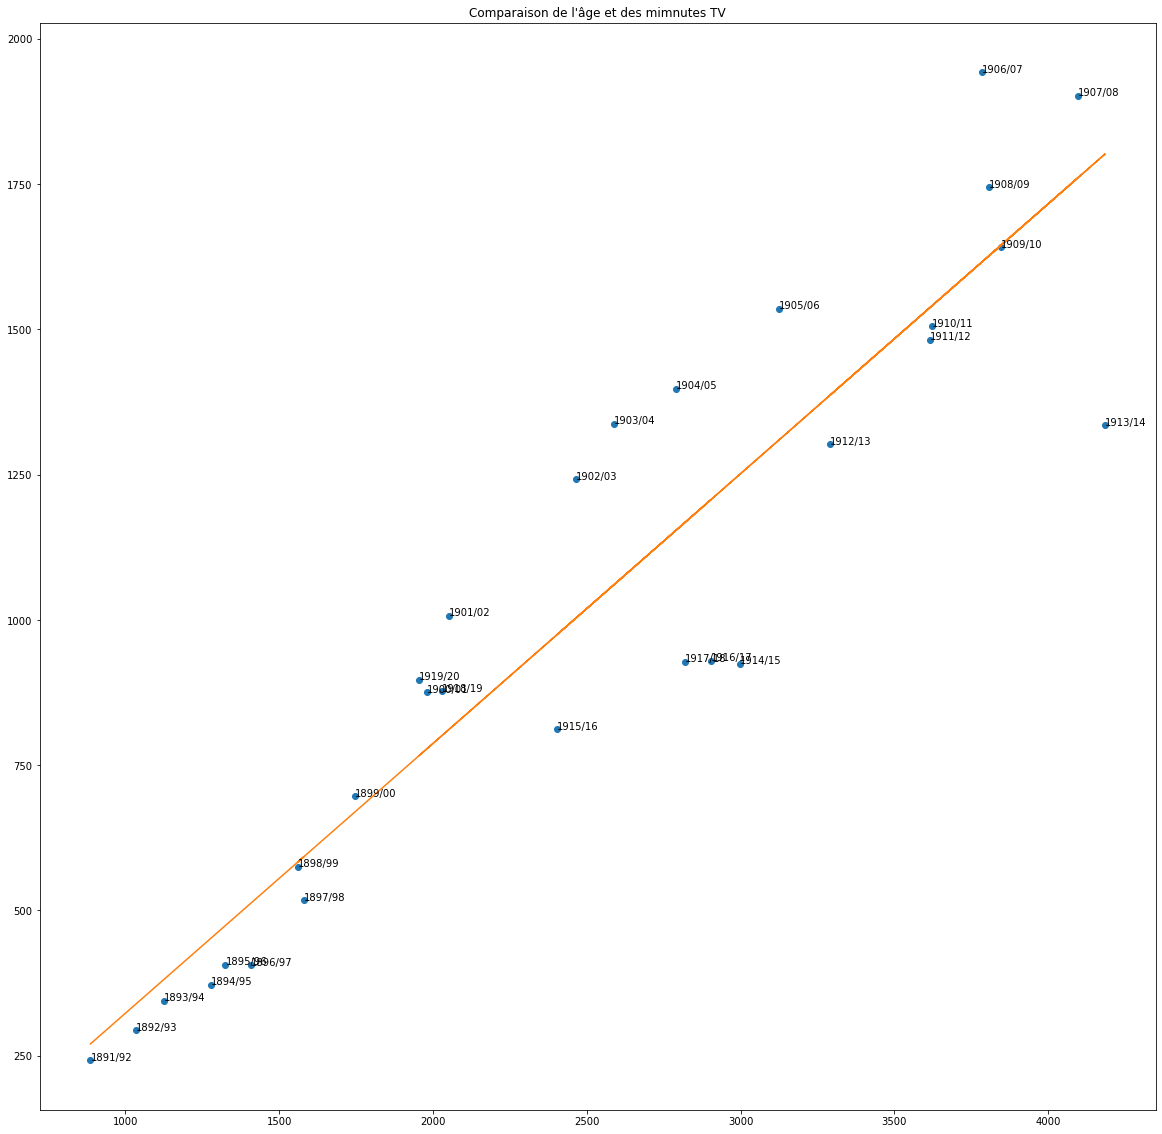

In [60]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python



x = np.array(obs_e3['Total_e'])
y = np.array(obs_e3['Total_f'])

plt.rcParams["figure.figsize"] = [20, 20]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des mimnutes TV")

### https://dataplotplus.com/add-text-labels-scatter-plot-in-python/
[plt.text(x=row['Total_e'], y=row['Total_f'], s=row['Année']) for k,row in obs_e3.iterrows()]



# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
plt.show()

## Effectif du foyer et revenu

In [26]:
obs['n_foyer'].describe()

count    130.000000
mean       2.130769
std        1.163984
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: n_foyer, dtype: float64

<AxesSubplot:>

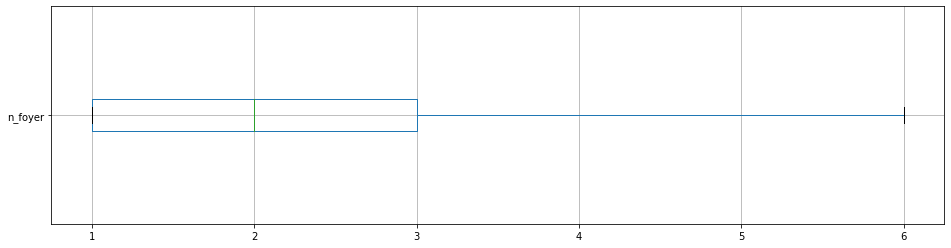

In [27]:
obs.boxplot(column=['n_foyer'], vert=False, figsize=(16,4))

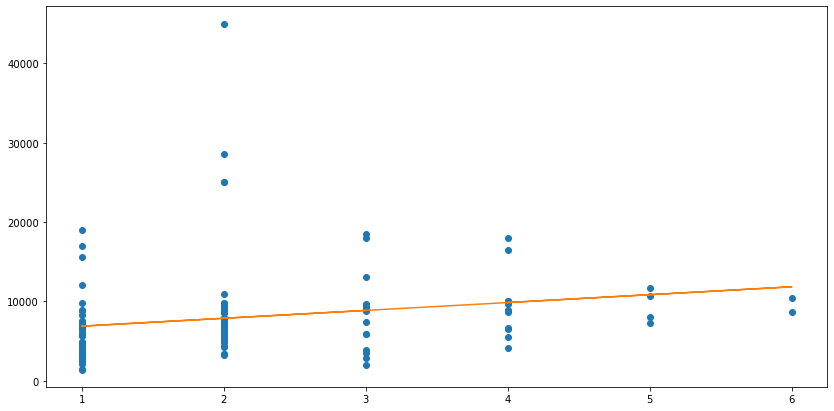

In [28]:
x = np.array(obs['n_foyer'])
y = np.array(obs['revenu_mensuel'])

plt.rcParams["figure.figsize"] = [14, 7]

plt.plot(x, y, 'o')


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

In [29]:
### Pearson Correlation Coefficient
# https://www.statology.org/pearson-correlation-coefficient/

r = np.corrcoef([x,y])[0][1]
r

0.2060462123695546

In [30]:
### https://www.statology.org/pearson-correlation-coefficient/
T = r * np.sqrt((len(obs)-2) / (1-r))
T

2.616206425213144

In [31]:
### p value
# https://www.statology.org/t-score-p-value-calculator/


# Variable qualitative et quantitative

Text(0, 0.5, 'Parti politique')

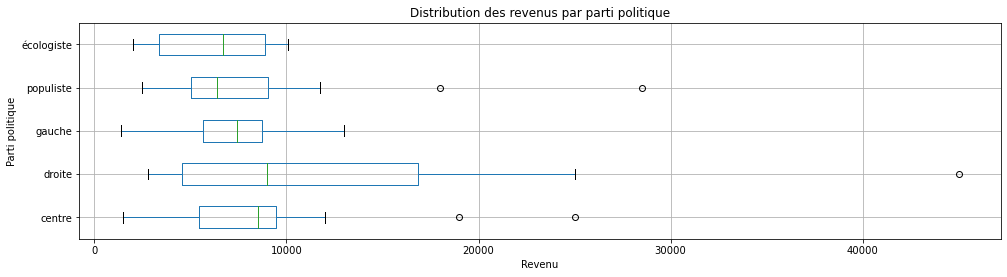

In [32]:
axes = obs.boxplot(column=['revenu_mensuel'],by=['parti'], vert=False, figsize=(16,4))

fig = axes.get_figure()

fig.suptitle('')
    
axes.set_title('Distribution des revenus par parti politique')

axes.set_xlabel('Revenu')
axes.set_ylabel('Parti politique')


In [33]:
obs[obs['parti'] == 'populiste']['revenu_mensuel'].describe()

count       30.000000
mean      7674.933333
std       5010.370700
min       2500.000000
25%       5036.750000
50%       6379.000000
75%       9032.750000
max      28500.000000
Name: revenu_mensuel, dtype: float64

# Deux variables qualitatives


* Hamon, Chapitre 4, 99-111


In [40]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec un découpage significatif au point de vue heuristique, et modifiable si besion
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs = obs.copy(deep=True)
c_obs['generation'] = pd.cut(c_obs['age'], generations, right=False)
# Inspection
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,"[36, 46)"
2,45,1,tous les jours,droite,7364,"[36, 46)"
3,54,3,de temps en temps,droite,8947,"[46, 56)"
4,86,2,tous les jours,populiste,6317,"[66, 91)"
5,77,2,tous les jours,gauche,6511,"[66, 91)"


In [41]:
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses

c_obs['generation'] = c_obs['generation'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,36-45
2,45,1,tous les jours,droite,7364,36-45
3,54,3,de temps en temps,droite,8947,46-55
4,86,2,tous les jours,populiste,6317,66-90
5,77,2,tous les jours,gauche,6511,66-90


### Tableau de contingence

In [42]:
### Le type d'origine est 'category' il faut transformer en 'str'
##  pour éviter le message d'erreur en créant la pivot_table
c_obs['generation']= c_obs['generation'].astype(str)

In [43]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "parti"  # "0"
Y = "generation"

c_obs_parti_generation = c_obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
c_obs_parti_generation

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,3,2,2,2,9,18
26-35,2,1,5,2,12,22
36-45,1,6,8,5,6,26
46-55,4,3,2,5,0,14
56-65,4,1,0,5,1,11
66-90,11,5,6,11,6,39
Total,25,18,23,30,34,130


In [44]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

c_obs_parti_generation_frequence = np.round(c_obs_parti_generation*100/c_obs_parti_generation.iloc[-1,-1],1)
c_obs_parti_generation_frequence

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,2.3,1.5,1.5,1.5,6.9,13.8
26-35,1.5,0.8,3.8,1.5,9.2,16.9
36-45,0.8,4.6,6.2,3.8,4.6,20.0
46-55,3.1,2.3,1.5,3.8,0.0,10.8
56-65,3.1,0.8,0.0,3.8,0.8,8.5
66-90,8.5,3.8,4.6,8.5,4.6,30.0
Total,19.2,13.8,17.7,23.1,26.2,100.0


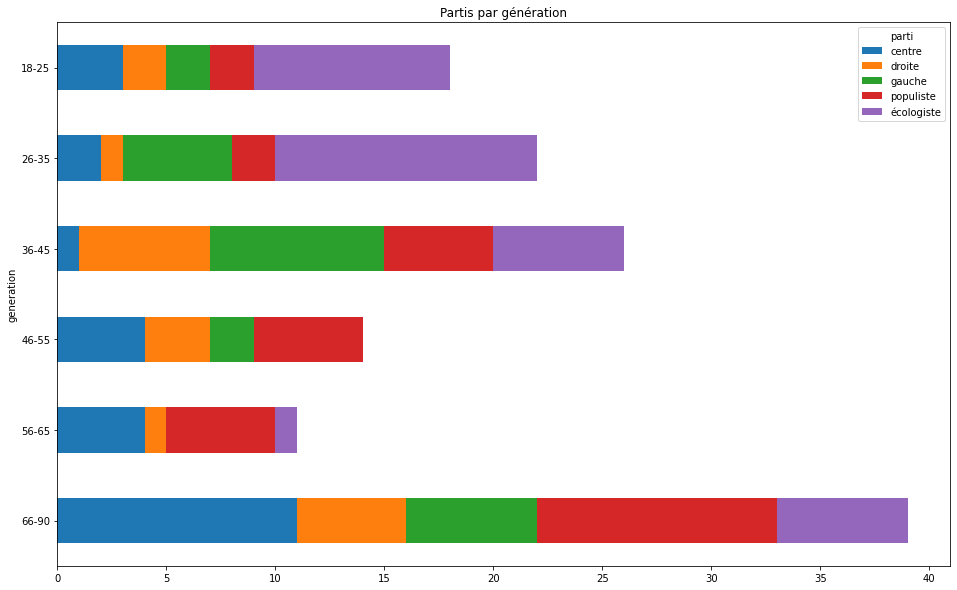

In [45]:
g = c_obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=False) \
        .plot( kind='barh', stacked=True,  figsize=(16,10),  title = 'Partis par génération')

In [56]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des lignes
stacked_data = c_obs_parti_generation.apply(lambda x: (x*100/sum(x)*2).round(2), axis=1) # axis=0
stacked_data

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,16.67,11.11,11.11,11.11,50.00,100.0
26-35,9.09,4.55,22.73,9.09,54.55,100.0
36-45,3.85,23.08,30.77,19.23,23.08,100.0
46-55,28.57,21.43,14.29,35.71,0.00,100.0
56-65,36.36,9.09,0.00,45.45,9.09,100.0
66-90,28.21,12.82,15.38,28.21,15.38,100.0
Total,19.23,13.85,17.69,23.08,26.15,100.0


parti       centre  droite  gauche  populiste  écologiste
generation                                               
18-25        16.67   11.11   11.11      11.11       50.00
26-35         9.09    4.55   22.73       9.09       54.55
36-45         3.85   23.08   30.77      19.23       23.08
46-55        28.57   21.43   14.29      35.71        0.00
56-65        36.36    9.09    0.00      45.45        9.09
66-90        28.21   12.82   15.38      28.21       15.38
Total        19.23   13.85   17.69      23.08       26.15


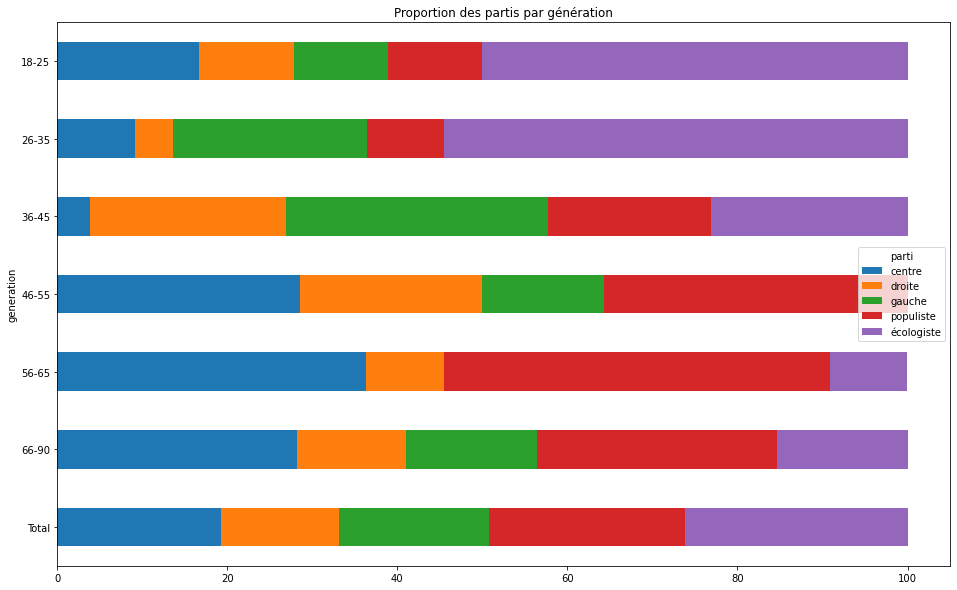

In [57]:
print(stacked_data.iloc[0:, 0:-1])

plot = stacked_data.iloc[0:, 0:-1].sort_values(by=Y, ascending=False)\
.plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

In [48]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data = c_obs_parti_generation.apply(lambda x: x*100/sum(x)*2, axis=0) # axis=0  1
stacked_data.transpose()

generation,18-25,26-35,36-45,46-55,56-65,66-90,Total
parti,,,,,,,
centre,12.000000,8.000000,4.000000,16.000000,16.000000,44.000000,100.0
droite,11.111111,5.555556,33.333333,16.666667,5.555556,27.777778,100.0
gauche,8.695652,21.739130,34.782609,8.695652,0.000000,26.086957,100.0
populiste,6.666667,6.666667,16.666667,16.666667,16.666667,36.666667,100.0
écologiste,26.470588,35.294118,17.647059,0.000000,2.941176,17.647059,100.0
Total,13.846154,16.923077,20.000000,10.769231,8.461538,30.000000,100.0


parti       centre     droite     gauche  populiste  écologiste      Total
generation                                                                
18-25         12.0  11.111111   8.695652   6.666667   26.470588  13.846154
26-35          8.0   5.555556  21.739130   6.666667   35.294118  16.923077
36-45          4.0  33.333333  34.782609  16.666667   17.647059  20.000000
46-55         16.0  16.666667   8.695652  16.666667    0.000000  10.769231
56-65         16.0   5.555556   0.000000  16.666667    2.941176   8.461538
66-90         44.0  27.777778  26.086957  36.666667   17.647059  30.000000


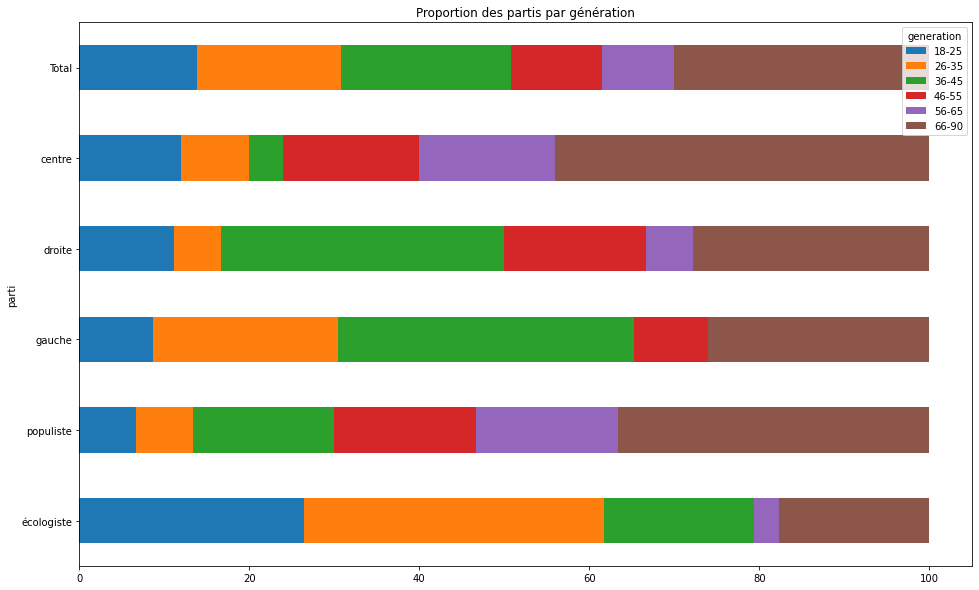

In [49]:
print(stacked_data.iloc[0:-1, 0:])

plot = stacked_data.iloc[0:-1, 0:].transpose().sort_values(by=X, ascending=False)\
.plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

### Tableau en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [50]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_generation.iat[-1,-1]

130

In [51]:
tx = c_obs_parti_generation.loc[:,["Total"]]
ty = c_obs_parti_generation.loc[["Total"],:]
n = c_obs_parti_generation.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


parti       centre  droite  gauche  populiste  écologiste  Total
generation                                                      
18-25            3       2       3          4           4     18
26-35            4       3       3          5           5     22
36-45            5       3       4          6           6     26
46-55            2       1       2          3           3     14
56-65            2       1       1          2           2     11
66-90            7       5       6          9          10     39
Total           25      18      23         30          34    130


In [58]:
#c_obs_parti_generation.iloc([:,:])

In [59]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_generation-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.astype(int))


parti       centre  droite  gauche  populiste  écologiste
generation                                               
18-25            0       0      -1         -2           4
26-35           -2      -2       1         -3           6
36-45           -4       2       3         -1           0
46-55            1       1       0          1          -3
56-65            1       0      -1          2          -1
66-90            3       0       0          2          -4


In [54]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = (c_obs_parti_generation-indep)**2/indep
ecarts_ponderes.iloc[:-1,:-1]

parti,centre,droite,gauche,populiste,écologiste
generation,,,,,
18-25,0.061538,0.097246,0.440654,1.116809,3.913575
26-35,1.176224,1.374437,0.315233,1.864802,6.780584
36-45,3.200000,1.600000,2.513043,0.166667,0.094118
46-55,0.635165,0.581319,0.091830,0.968864,3.661538
56-65,1.679021,0.179643,1.946154,2.386946,1.224517
66-90,1.633333,0.029630,0.117391,0.444444,1.729412


42.02413634169815


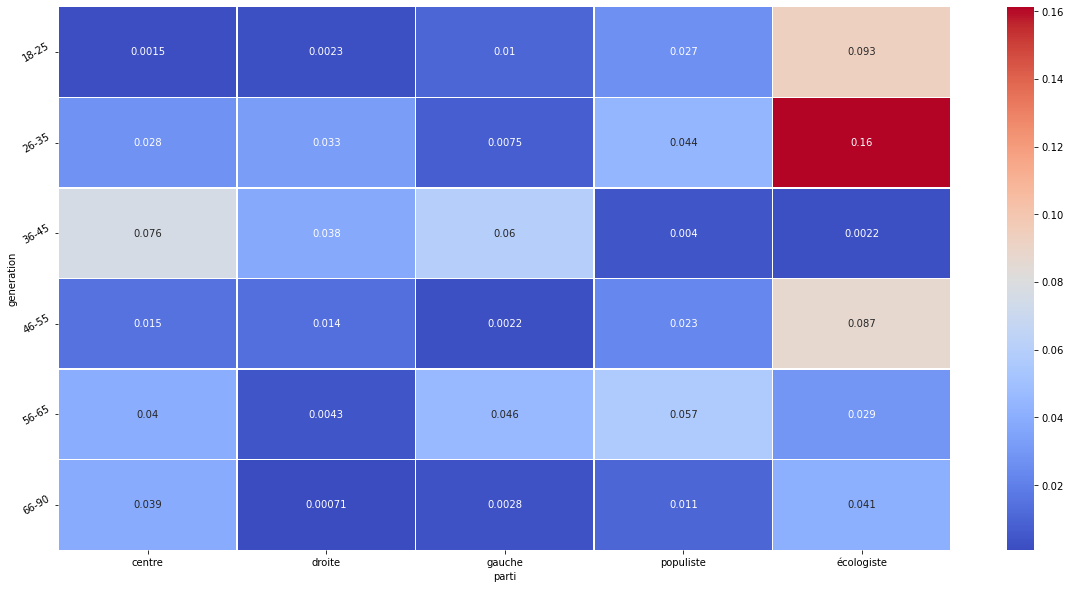

In [55]:
xi_n = ecarts_ponderes.sum().sum()
print(xi_n)


tableau = ecarts_ponderes.iloc[:-1,:-1]/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

### Appartenance politique et fréquence de lecture du journal

In [80]:
X = "parti"  # "0"
Y = "lecture_journal"

c_obs_parti_lecture = c_obs[[Y,X]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int) 
c_obs_parti_lecture

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement,Total
parti,,,,,,
centre,5,6,3,6,5,25
droite,2,6,3,4,3,18
gauche,3,3,2,5,10,23
populiste,4,9,3,9,5,30
écologiste,3,7,6,11,7,34
Total,17,31,17,35,30,130


In [81]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_lecture.iat[-1,-1]

130

In [82]:
c_obs_parti_lecture.iloc[:-1,:-1]

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement
parti,,,,,
centre,5,6,3,6,5
droite,2,6,3,4,3
gauche,3,3,2,5,10
populiste,4,9,3,9,5
écologiste,3,7,6,11,7


In [83]:
tx = c_obs_parti_lecture.loc[:,["Total"]]
ty = c_obs_parti_lecture.loc[["Total"],:]
n = c_obs_parti_lecture.iat[-1,-1]   # .iloc[:-1,:-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


lecture_journal  de temps en temps  le week-end  tous les jours  \
parti                                                             
centre                           3            5               3   
droite                           2            4               2   
gauche                           3            5               3   
populiste                        3            7               3   
écologiste                       4            8               4   
Total                           17           31              17   

lecture_journal  trois-quatre fois par semaine  très rarement  Total  
parti                                                                 
centre                                       6              5     25  
droite                                       4              4     18  
gauche                                       6              5     23  
populiste                                    8              6     30  
écologiste                           

In [77]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_lecture-indep)
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.iloc[:-1,:-1].astype(int))


lecture_journal  de temps en temps  le week-end  tous les jours  \
parti                                                             
centre                           1            0               0   
droite                           0            1               0   
gauche                           0           -2              -1   
populiste                        0            1               0   
écologiste                      -1           -1               1   

lecture_journal  trois-quatre fois par semaine  très rarement  
parti                                                          
centre                                       0              0  
droite                                       0             -1  
gauche                                      -1              4  
populiste                                    0             -1  
écologiste                                   1              0  


In [80]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = ((c_obs_parti_lecture-indep)**2/indep).iloc[:-1,:-1]
ecarts_ponderes

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement
parti,,,,,
centre,0.916290,0.000248,0.022172,0.079341,0.102564
droite,0.053193,0.679404,0.177376,0.147741,0.320513
gauche,0.000020,1.125569,0.337616,0.229575,4.148272
populiste,0.001508,0.476427,0.217195,0.105495,0.534188
écologiste,0.470375,0.151336,0.543040,0.372334,0.091252


11.303040314550042


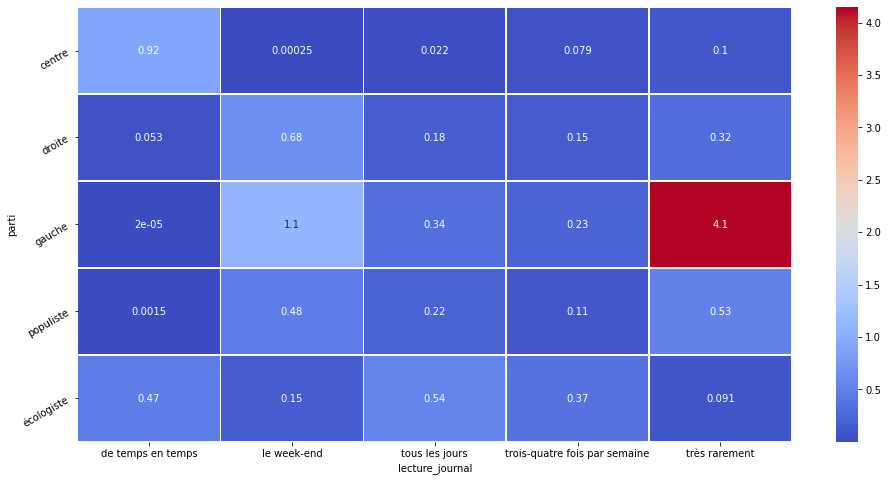

In [82]:
## Chi2 :somme des écarts pondérés

xi_n = ecarts_ponderes.sum().sum() 
print(xi_n)

table = ecarts_ponderes/xi_n
fig, ax = plt.subplots(figsize=(16,8))         
# Sample figsize in inches
g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labels = ecarts_ponderes.index
p = g.set_yticklabels(labels, rotation=30)